In [140]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict
import torch.nn as nn
import torch.nn.functional as F

In [278]:
class DiscreteSymmetry(Dataset):
   
    def __init__(self, n_samples):
        
        f_min_b, f_max_b = (-1.0 , 1.0)
        (x_min_b, x_max_b) = (0.0, np.pi)
        
        n_samples
    
        f_x = self._custom_norm_t(torch.randn(n_samples, 64), f_min_b, f_max_b)
        x = self._custom_norm_t(torch.randn(n_samples,64), x_min_b, x_max_b)
       
        labels =labels = {'even' : torch.tensor([1,0]),
                          'odd'  : torch.tensor([0,1])                
                         }
        
        even = torch.cat((x, f_x, -x, f_x,
                          labels['even'].repeat(n_samples,1)),
             dim=1)
        odd = torch.cat((x, f_x, -x, -f_x,
                           labels['odd'].repeat(n_samples,1)),
             dim=1)
        
        
        self.data = torch.cat((even, odd), dim=0) 
        
    def __getitem__(self, index):
        
        return self.data[index, :-2], self.data[index, -2:]
    
    def __len__(self):
        return self.data.shape[0]
    
    
    def _custom_norm_t(self, t, min_b, max_b, dim=1):
        """ maps tensor to user defined interval"""
        t_min = t.min(dim = dim)[0].unsqueeze(1)
        t_max = t.max(dim = dim)[0].unsqueeze(1)
        t = (t - t_min)  /  (t_max - t_min) * (max_b - min_b) + min_b
        return t
        

In [441]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.block= nn.Sequential(
            OrderedDict([
            ("relu1" , nn.ReLU()),
            ("hidden_layer_1" , nn.Linear(4*64, 1)),
            ("relu2" , nn.ReLU()),    
            ("hidden_layer_2" , nn.Linear(1, 2)),
            ("softmax" , nn.Softmax(dim=1)), 
            ]))
            
        
    def forward(self, x):
        x = self.block(x)
        return x

In [442]:
learning_rate = 0.01


In [443]:
symm = DiscreteSymmetry(10000)

In [444]:
dataloader = DataLoader(dataset=symm, 
                        shuffle=True
                       )

In [445]:
n_epochs = 4
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
model = Net()
model.eval()
for epoch in range(n_epochs):
    for i, (x, label) in enumerate(dataloader):
        out = model(x)
        loss = loss_fn(out, label)
        # forward path
        optimizer.zero_grad()
        loss.backward()
        optimizer.step
    print(f"Epoch {epoch}, Loss {loss}")

Epoch 0, Loss 0.547305166721344
Epoch 1, Loss 0.07045091688632965
Epoch 2, Loss 0.06476829946041107
Epoch 3, Loss 0.08623415231704712


In [398]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

block.hidden_layer_1.weight tensor([[-0.0266,  0.0163,  0.0190,  0.0612,  0.0139,  0.0233,  0.0077,  0.0256,
          0.0396,  0.0213,  0.0434,  0.0490, -0.0364, -0.0326,  0.0340, -0.0621,
         -0.0542, -0.0070,  0.0452, -0.0512,  0.0100, -0.0027,  0.0233,  0.0307,
         -0.0173, -0.0217, -0.0188, -0.0412, -0.0212, -0.0038,  0.0248, -0.0550,
         -0.0182, -0.0022, -0.0592, -0.0372,  0.0203, -0.0115,  0.0477, -0.0614,
         -0.0532,  0.0486,  0.0588, -0.0036,  0.0580, -0.0493,  0.0347,  0.0391,
          0.0022, -0.0251,  0.0371, -0.0459, -0.0315, -0.0225,  0.0599,  0.0552,
          0.0232, -0.0408,  0.0311,  0.0419,  0.0182, -0.0352,  0.0404, -0.0520,
         -0.0131,  0.0489,  0.0206, -0.0199,  0.0411, -0.0418, -0.0615, -0.0079,
         -0.0039,  0.0320,  0.0339, -0.0226, -0.0511, -0.0239,  0.0357,  0.0301,
          0.0575, -0.0207,  0.0534,  0.0080,  0.0073, -0.0317, -0.0439, -0.0437,
         -0.0529,  0.0215, -0.0156,  0.0364,  0.0169, -0.0495,  0.0187,  0.0096,


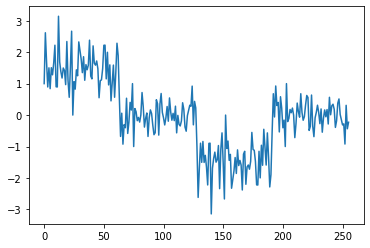

In [397]:
plt.plot(list(dataloader)[0][0].numpy().T)